In [2]:
git_repo = '../../../..'

import sys
import os

sys.path.insert(0, os.path.join(git_repo, 'BNP_sensitivity/GMM_clustering/'))
sys.path.insert(0, '../../../../LinearResponseVariationalBayes.py/')

# Linear response libraries
import LinearResponseVariationalBayes as vb
import LinearResponseVariationalBayes.SparseObjectives as obj_lib

# My libraries
import gmm_clustering_lib as gmm_utils
import modeling_lib 
import functional_sensitivity_lib as fun_sens_lib 
import utils_lib

import matplotlib.pyplot as plt
%matplotlib inline

from copy import deepcopy

import numpy as np
import scipy as sp

np.random.seed(453453)

import json 

In [4]:
# Load results from previous fit.
json_input_file = os.path.join(
    git_repo, 'BNP_sensitivity/GMM_clustering/iris_fits/bnp_full_data_fit_alpha8.0_iris.json')

with open(json_input_file, 'r') as fp:
    fit_dict = json.load(fp)
    model = gmm_utils.get_model_from_checkpoint(fit_dict)
    model_ = gmm_utils.get_model_from_checkpoint(fit_dict)
    best_param = model.global_vb_params.get_free()
    kl_hessian = gmm_utils.get_kl_hessian_from_checkpoint(fit_dict)

In [5]:
dim = 4
n_obs = 10
probs = np.random.random((n_obs, dim))
probs = probs / np.sum(probs, axis=1)[:, np.newaxis]

#print(probs)
#print(np.cumsum(probs, axis=1))


def draw_components(probs, u):
    selection = (u <= np.cumsum(probs, axis=1))
    components = np.argmax(selection, axis=1)
    indicator_mat = np.zeros_like(probs)
    indicator_mat[range(n_obs), components] = 1
    return components, indicator_mat

def count_components(components, dim):
    return np.array([ np.sum(components == k) for k in range(dim) ])



In [6]:
u = np.random.random((n_obs, 1))
components, indicator_mat = draw_components(probs, u)

In [10]:
indicator_mat

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

[[0.368 0.092 0.183 0.357]
 [0.331 0.359 0.187 0.123]
 [0.071 0.309 0.436 0.184]
 [0.243 0.03  0.143 0.584]
 [0.313 0.284 0.383 0.02 ]
 [0.065 0.195 0.344 0.396]
 [0.434 0.124 0.401 0.041]
 [0.392 0.413 0.151 0.044]
 [0.652 0.082 0.139 0.127]
 [0.025 0.438 0.395 0.142]]
[[0.3792684  0.08335252 0.18281882 0.35456025]
 [0.34258998 0.34410085 0.17983593 0.13347324]
 [0.07593617 0.2848943  0.47136448 0.16780504]
 [0.25025919 0.03298179 0.1253027  0.59145632]
 [0.31972712 0.28430706 0.3812427  0.01472312]
 [0.07543681 0.20106077 0.31761793 0.40588448]
 [0.44622776 0.12291491 0.38842502 0.04243231]
 [0.38733532 0.40677271 0.1492101  0.05668188]
 [0.62396806 0.09523552 0.15690112 0.12389531]
 [0.04136744 0.42839802 0.38545759 0.14477695]]


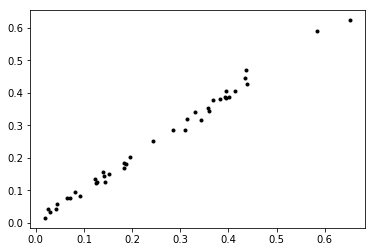

In [7]:
dim = 4
n_obs = 10
probs = np.random.random((n_obs, dim))
probs = probs / np.sum(probs, axis=1)[:, np.newaxis]

n_sims = 1000
count_mat = np.zeros_like(probs)
for sim in range(n_sims):
    u = np.random.random((n_obs, 1))
    components, indicator_mat = draw_components(probs, u)
    count_mat += indicator_mat
    
print(count_mat / n_sims)
print(probs)
plt.plot(count_mat / n_sims, probs, 'k.')

In [8]:

u = np.random.random((n_obs, 1))
components, indicator_mat = draw_components(probs, u)

count_components(components, dim)

array([1, 3, 4, 2])